# **<u>MLP Project (2023 May Term)</u>**
## Sentiment Prediciton on Movie Reviews
## Vishal Reddy Parvatha Reddy

<font size="3">
This project focuses on a classification problem, where it has to be predicted whether a movie review is positive or negative, mostly based on the review text left by various reviewers
</font>

In [1]:
import warnings
warnings.filterwarnings("ignore")

<font size="3">
The given files are train.csv (training data), movies.csv (meta-data for various movies) and test.csv (test data). <br>
Here, the training data and movies metadata are imported and merged:
</font>

### Download the following files and place them in the same folder as the notebook:

1. [train.csv](https://drive.google.com/file/d/1UEDCYbeXSJgvWVKli6q_jdsg_R7jjEA4/view?usp=drive_link)<br>
2. [movies.csv](https://drive.google.com/file/d/13bJHekTfMmC9M3whZJv2Loh6JLvTC1o1/view?usp=drive_link)

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import os


cur_path=os.getcwd()
data=pd.read_csv(cur_path+"/train.csv")
movies=pd.read_csv(cur_path+"/movies.csv")
movies.drop_duplicates(subset=['movieid'],inplace=True)
data=data.merge(movies,how='left',on="movieid")

data.drop(['movieid'],axis=1,inplace=True)

# Exploratory Data Analysis

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162758 entries, 0 to 162757
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   reviewerName          162758 non-null  object 
 1   isFrequentReviewer    162758 non-null  bool   
 2   reviewText            156311 non-null  object 
 3   sentiment             162758 non-null  object 
 4   title                 162758 non-null  object 
 5   audienceScore         149510 non-null  float64
 6   rating                99034 non-null   object 
 7   ratingContents        99034 non-null   object 
 8   releaseDateTheaters   126924 non-null  object 
 9   releaseDateStreaming  146573 non-null  object 
 10  runtimeMinutes        159382 non-null  float64
 11  genre                 160320 non-null  object 
 12  originalLanguage      159468 non-null  object 
 13  director              162758 non-null  object 
 14  boxOffice             109982 non-null  object 
 15  

In [4]:
data.isna().sum()

reviewerName                0
isFrequentReviewer          0
reviewText               6447
sentiment                   0
title                       0
audienceScore           13248
rating                  63724
ratingContents          63724
releaseDateTheaters     35834
releaseDateStreaming    16185
runtimeMinutes           3376
genre                    2438
originalLanguage         3290
director                    0
boxOffice               52776
distributor             40663
soundType               85367
dtype: int64

In [5]:
data['sentiment'].value_counts()

sentiment
POSITIVE    108761
NEGATIVE     53997
Name: count, dtype: int64

In [6]:
data.head()

,reviewerName,isFrequentReviewer,reviewText,sentiment,title,audienceScore,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,boxOffice,distributor,soundType
0,Benjamin Henry,False,Henry Selick’s first movie since 2009’s Corali...,POSITIVE,Marvelous Pirate,65.0,PG-13,"['Violence', 'Brief Strong Language', 'Substan...",2022-10-21,2022-10-28,105.0,"Comedy, Animation, Adventure, Fantasy",English,Bennie Basso,NaN,Netflix,NaN
1,Felicia Lopez,False,With a cast that reads like the Vogue Oscar pa...,NEGATIVE,Tony Montana Frodo Baggins V Rocky Balboa,NaN,NaN,NaN,NaN,2013-01-08,91.0,Action,English,Alma White,NaN,NaN,NaN
2,Mr. Charles Burgess,True,Creed II does not give us anything but another...,POSITIVE,Darth Vader Katniss Everdeen Sorcerer Donnie D...,80.0,PG-13,"['Language', 'A Scene of Sensuality', 'Sports ...",2018-11-21,2019-02-12,130.0,Drama,English,Bobby Oleary,$115.7M,"Warner Bros. Pictures, Metro-Goldwyn-Mayer",NaN
3,Ryan Barrett,False,"I know what you're thinking, but this is no Li...",POSITIVE,Lara Croft Glimmer,NaN,NaN,NaN,NaN,2020-06-02,15.0,Drama,Spanish,Eric Hutcherson,NaN,NaN,NaN
4,Alexander Glover,False,Director Fernando Meirelles tells the story wi...,POSITIVE,Jason Bourne Surreal The Terminator Indiana Jones,97.0,R,"['Language', 'Drug Content', 'Sexuality', 'Str...",2003-01-17,2004-06-08,131.0,"Crime, Drama",Portuguese (Brazil),John Trent,$7.6M,Miramax Films,"Surround, Dolby SR, Dolby Digital, Dolby A, Do..."


In [7]:
# Importing required libraries for plotting
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

## 1) Audience Score Counts

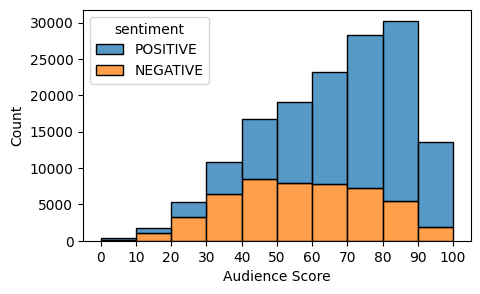

In [8]:
sb.histplot(data=data,x='audienceScore',binwidth=10,hue='sentiment',multiple='stack')
plt.xticks(np.arange(0,101,10))
plt.gcf().set_size_inches(5, 3) 
plt.xlabel("Audience Score")
plt.show()

In [9]:
high_rated=data["audienceScore"].loc[(70<data["audienceScore"]) & (data["audienceScore"]<100)].shape[0]
print(f'{high_rated/149510*100:.2f}% of movies rated by the audience have a score above 70')

46.41% of movies rated by the audience have a score above 70


<font size="3">
Close to 50% of the audience score values are high (greater that 70). For each bin, as the score decreases, the proportion of positive sentiment reviews also decreases as expected. Still, the high absolute number of negative reviews in the movies that the audience score "highly" may suggest that reviewers and the general audience have different metrics by which they evaluate a movie.
</font>

## 2) Rating Categories Counts

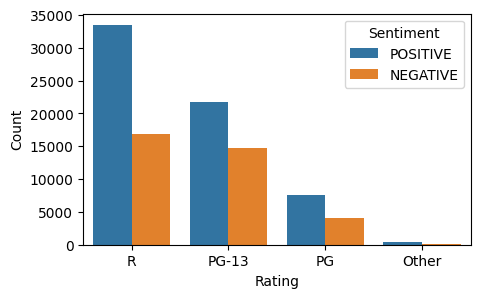

In [10]:
other={}
for i in data['rating'].value_counts().index[3:]:
    other[i]='Other'
data['rating'].replace(other,inplace=True)
sb.countplot(data=data,x='rating',order=data['rating'].value_counts().index,hue='sentiment')
plt.xlabel("Rating")
plt.ylabel("Count")
plt.legend(title="Sentiment")
plt.gcf().set_size_inches(5, 3) 
plt.show()

<font size="3">
Most movies belong to the R, PG-13, and PG rating categories, in that order. Other ratings not shown in the plot are: NC-17, TVPG, TV14, and TVMA. R-rated movies, being the most abundant rating, also has the highest proportion of positive reviews, with them being roughly double the number of negative reviews.
</font>

## 3) Theater and Streaming Release Years

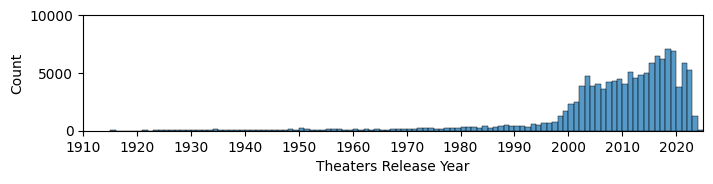

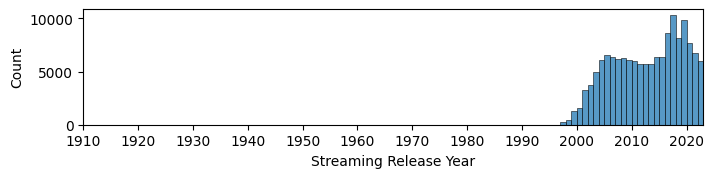

In [11]:
rd={1:'releaseDateTheaters',2:'releaseDateStreaming'}

for i in rd:
    plt.figure(i)
    years=data[rd[i]].dropna().astype("datetime64[ns]").dt.year
    plt.margins(x=0)
    sb.histplot(years,bins=range(1910,2030,10),binwidth=1)
    plt.xlabel("Release Year")
    plt.xticks(np.arange(1910,2030,10))
    plt.yticks(np.arange(0,10001,5000))
    plt.gcf().set_size_inches(8, 1.5)
    plt.xlabel(f"{rd[i][11:]} Release Year")
plt.show()

<font size="3">
The number of movies released in theaters by year saw a rise towards the end of the 20th century, which was also around the time movies started being released in streaming services. The sudden drop in the theater releases in 2020, compared to 2019, may suggest the COVID-19 pandemic had a significant effect on the film industry. 
</font>

## 4) Movie Distributor Share

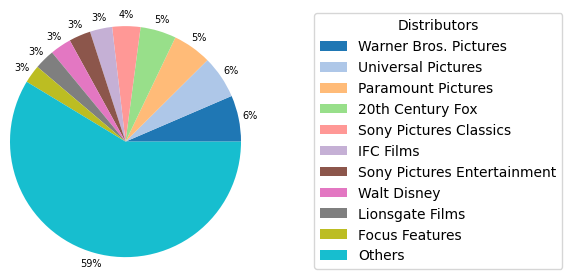

In [12]:
from matplotlib import cm
dvc=data['distributor'].value_counts()[:10]
dvc.loc['Others']=data['distributor'].value_counts()[10:].sum()
fig,ax=plt.subplots()
ax.pie(dvc,radius=2.5,colors=cm.tab20(np.arange(11)/11),autopct='%1.0f%%',textprops={'fontsize': 7},pctdistance=1.1)
plt.gcf().set_size_inches(5, 1.5)
plt.legend(dvc.index,loc="center right",bbox_to_anchor=(1.4,0.5),bbox_transform=fig.transFigure,title="Distributors")
plt.show()

In [13]:
dist_unique=data['distributor'].nunique()
print(f'Total number of unique film distributors: {dist_unique}')

Total number of unique film distributors: 1610


<font size="3">
Looking at the share of movies distributed by various companies, the top ten out of 1610 distributors account for more than 40% of all movies releases.
</font>

## 5) Runtime vs Audience Score

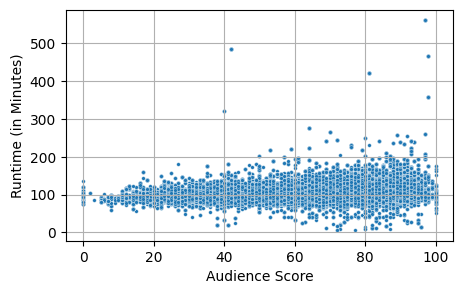

In [14]:
sb.scatterplot(data=data,y='runtimeMinutes',x='audienceScore',s=7)
plt.grid()
plt.xlabel("Audience Score")
plt.ylabel("Runtime (in Minutes)")
plt.gcf().set_size_inches(5, 3)
plt.show()

<font size="3">
From the scatterplot, as the audience score increases, the range of movie runtime also increases. This may suggest that the 'goodness' or quality of a movie is less influenced by the runtime itself. Many outliers can be observed in the runtime category, with some being over 5 hours long.
</font>

<font size="3">
Some data pre-processing is needed before the rest of the analysis. Dropping columns with many missing values, or those that may encounter a high number of unseen values in test data:
</font>

In [15]:
y=data['sentiment']
train=data.drop(['isFrequentReviewer','reviewerName','rating','ratingContents','releaseDateTheaters',
                 'originalLanguage','releaseDateStreaming','director','boxOffice','distributor','soundType','sentiment'], axis=1)

In [16]:
# Finding number of outliers in the runtimeMinutes 
rm="runtimeMinutes"
q1 = train[rm].quantile(0.25)
q3 = train[rm].quantile(0.75)
iqr = q3 - q1
no_outliers=((train[rm] < (q1 - 1.5 * iqr)) | (train[rm] > (q3 + 1.5 * iqr))).sum()
print("Outliers in "+rm+": "+str(no_outliers))

Outliers in runtimeMinutes: 5373


<font size="3">
A pipeline is being used to impute data into the columns with scikit-learn's SimpleImputer.
<br><br>
1)  Since imputing text data in a proper manner would require deep knowledge in natural language processing, the reviewText column has been imputed with empty strings. <br>
2)  audienceScore is imputed with the mean of the data, while runtimeMinutes is imputed with the median as outliers were observed in the data. <br>
3)  The genre column, being categorical data, is imputed with the mode of the column, which is the drama genre.
</font>

In [17]:
# Imputing wherever necessary
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer,KNNImputer

impute_pipe=ColumnTransformer([
    ('empty',SimpleImputer(strategy='constant',fill_value=''),['reviewText']),
    ('pass','passthrough',['title']),
    ('mean',SimpleImputer(strategy='mean'),['audienceScore']),
    ('median',SimpleImputer(strategy='median'),['runtimeMinutes']),
    ('mode',SimpleImputer(strategy='most_frequent'),['genre']),
    ])

train=pd.DataFrame(impute_pipe.fit_transform(train),columns=train.columns)

In [18]:
# Applying regex to text columns:
import re

def reg1(txt):
  txt=re.sub("['\""+chr(8217)+"]"+r"\S*\b","",txt)  # chr (8217): different apostrophe appearing multiple times
  txt=re.sub("[^a-zA-Z]"," ",txt)
  txt=re.sub("\s+"," ",txt.strip())
  return txt

# TfidfVectorizer considers genres like "kids & family" and "sci-fi" as two separate genres
def reg2(txt):
  txt=re.sub(" & ","/",txt) 
  txt=re.sub("-","",txt)
  return txt

for i in ['reviewText','title']:
  train[i]=train[i].apply(reg1)

train['genre']=train['genre'].apply(reg2)

## 6) Genres Counts

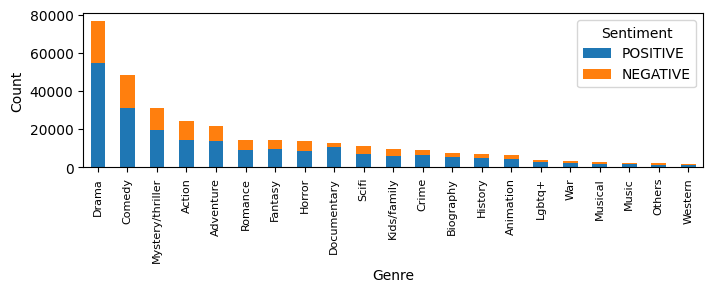

In [19]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb=MultiLabelBinarizer()
genres=mlb.fit_transform(train['genre'].apply(lambda x:x.split(', ')))
genres=pd.DataFrame(genres,columns=mlb.classes_)
genres['sentiment']=y
gvss=pd.DataFrame(index=genres.columns,columns=('POSITIVE','NEGATIVE','sum'))

sent={0:'POSITIVE',1:'NEGATIVE'}
for i in mlb.classes_:
  for j in (0,1):
    gvss.loc[i][j]=genres[(genres[i]==1) & (genres['sentiment']==sent[j])][i].sum()
  gvss.loc[i][2]=gvss.loc[i][0]+gvss.loc[i][1]
gvss.drop('sentiment',inplace=True)
gvss.sort_values(by='sum',ascending=False,inplace=True)
gvss.loc['Others']=gvss.iloc[20:].sum()
gvss.sort_values(by='sum',ascending=False,inplace=True)
gvss.drop('sum',axis=1,inplace=True)
gvss=gvss.iloc[:21]

gvss.plot(kind='bar',stacked=True)
plt.ylabel("Count")
plt.xlabel("Genre")
plt.gcf().set_size_inches(8, 2)
plt.xticks(fontsize=8)
plt.legend(title="Sentiment")
plt.show()

<font size="3">
It should be noted that movies are tagged with different genres. With that said, almost half the movies in the data belong to the drama genre. The high proportion of positive reviews for documentary films may suggest that the quality and effort put into them are higher.</font>

# Data Pre-Processing

In [20]:
from sklearn.preprocessing import LabelEncoder

y=LabelEncoder().fit_transform(y)

### Pre-Processing Train Data
<font size="3">
1) TfidfVectorizer is being used on the reviewText, title, and genre columns. Feature selection for reviewText is being done with TfidfVectorizer itself. <br>
2) ngram_range(1,2) not only considers individual words, but also considers pairs of words, which may lead to better capturing of the context of the words, at the cost of a much increased number of features. <br>
3) MaxAbsScaler keeps the values of the audienceScore between 0 and 1. <br>
4) RobustScaler, which is applied to the runtimeMinutes column, is a form of scaling that helps in dealing with outliers, where each value is divided by the median of the column then divided by the inter-quartile rarnge of the column. <br>
</font>

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MaxAbsScaler, RobustScaler

col_tsfmr=ColumnTransformer([
    ('r_tfidf',TfidfVectorizer(ngram_range=(1,2),max_features=40000,min_df=10),'reviewText'),
    ('t_tfidf',TfidfVectorizer(ngram_range=(1,2)),'title'),
    ('mas',MaxAbsScaler(),['audienceScore']),
    ('rs',RobustScaler(),['runtimeMinutes']),
    ('g_tfidf',TfidfVectorizer(),'genre')
],n_jobs=-1)

In [22]:
# Splitting the data in 9:1 ratio into training and validation datasets
from sklearn.model_selection import train_test_split as tts

X_train,X_val,y_train,y_val=tts(train,y,test_size=0.1,random_state=10)

# Applying column transformer pre-processing
X_train=col_tsfmr.fit_transform(X_train)
X_val=col_tsfmr.transform(X_val)

In [23]:
for i in (0,1,4):
    nf=len(col_tsfmr.transformers_[i][1].vocabulary_)
    col=col_tsfmr.transformers_[i][2]
    print(f'Number of features from {col}: {nf}')
    
print(f'\nTotal number of features: {X_train.shape[1]}')

Number of features from reviewText: 40000
Number of features from title: 15903
Number of features from genre: 38

Total number of features: 55943


# Model Training with GridSearchCV

<font size='3'>
Here, a diverse set of models have been chosen for training the data:

1) LogisticRegression: Versatile algorithm with good interpratability and ease of implementation. <br>
2) SGDClassifier: Memory-efficient classifier that employs stochastic gradient descent. Converges quickly for large-scale datasets.<br>
3) LinearSVC: Support Vector Machine algorithm that converges quicker compared to its counterparts. Robust to outliers.
</font>

## 1) LogisticRegression

In [24]:
from sklearn.linear_model import LogisticRegression
'''
from sklearn.model_selection import GridSearchCV

logreg=LogisticRegression(max_iter=5000,random_state=10)

pg_base={'C':np.arange(1,5),
         'fit_intercept':[False,True]}
pg=[
    {
      'penalty':['l1','l2'],
      'solver':['liblinear']
    },
    {
      'penalty':['l2'],
      'solver':['lbfgs']
    }
]
for i in pg:
  i.update(pg_base)
gscv=GridSearchCV(logreg,pg,verbose=4,cv=5)
gscv.fit(X_train,y_train)
logreg_gs=gscv.best_estimator_
print(gscv.best_params_)
'''
logreg_gs=LogisticRegression(max_iter=5000,random_state=10,penalty='l2',C=2,solver='lbfgs')
logreg_gs.fit(X_train,y_train)
y_pred_logreg=logreg_gs.predict(X_val)

In [25]:
print(f'Training scsore: {logreg_gs.score(X_train,y_train)}')
print(f'Validation score: {logreg_gs.score(X_val,y_val)}')

Training scsore: 0.9008888464111632
Validation score: 0.8393339886950111


In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

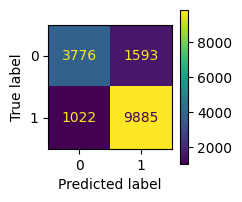

In [27]:
cm=confusion_matrix(y_val,y_pred_logreg)
matrix=ConfusionMatrixDisplay(confusion_matrix=cm)
matrix.plot()
plt.gcf().set_size_inches(2, 2)
plt.show()

In [28]:
print(classification_report(y_val,y_pred_logreg)) 

              precision    recall  f1-score   support

           0       0.79      0.70      0.74      5369
           1       0.86      0.91      0.88     10907

    accuracy                           0.84     16276
   macro avg       0.82      0.80      0.81     16276
weighted avg       0.84      0.84      0.84     16276



## 2) SGDClassifier

In [29]:
from sklearn.linear_model import SGDClassifier
'''
from sklearn.model_selection import GridSearchCV

sgdc=SGDClassifier(max_iter=5000,random_state=10)
pg_base={
      'loss':['modified_huber','perceptron'],
      'penalty':['l1','l2'],
      'alpha':np.logspace(-5,-3,3),
      'fit_intercept':[False,True],
      'eta0':np.logspace(-2,0,3)
}

pg=[{'learning_rate':['adaptive']},
    {'learning_rate':['invscaling'],'power_t':np.arange(0.20,0.35,0.05)}]

for i in pg:
  i.update(pg_base)

gscv=GridSearchCV(sgdc,pg,verbose=4,cv=5)
gscv.fit(X_train,y_train)
sgdc_gs=gscv.best_estimator_
print(gscv.best_params_)
'''
sgdc_gs=SGDClassifier(max_iter=5000,
                      random_state=10,
                      alpha=1e-05,
                      eta0=0.1,
                      fit_intercept=True,
                      learning_rate='invscaling',
                      loss='modified_huber',
                      penalty='l2',
                      power_t=0.25)
sgdc_gs.fit(X_train,y_train)
y_pred_sgdc=sgdc_gs.predict(X_val)

In [30]:
print(f'Training scsore: {sgdc_gs.score(X_train,y_train)}')
print(f'Validation score: {sgdc_gs.score(X_val,y_val)}')

Training scsore: 0.8964855750194564
Validation score: 0.8393339886950111


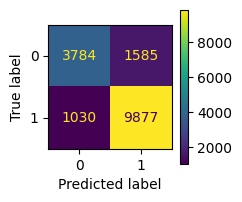

In [31]:
cm=confusion_matrix(y_val,y_pred_sgdc)
matrix=ConfusionMatrixDisplay(confusion_matrix=cm)
matrix.plot()
plt.gcf().set_size_inches(2, 2)
plt.show()

In [32]:
print(classification_report(y_val,y_pred_sgdc))

              precision    recall  f1-score   support

           0       0.79      0.70      0.74      5369
           1       0.86      0.91      0.88     10907

    accuracy                           0.84     16276
   macro avg       0.82      0.81      0.81     16276
weighted avg       0.84      0.84      0.84     16276



## 3) LinearSVC

In [33]:
from sklearn.svm import LinearSVC
'''
from sklearn.model_selection import GridSearchCV

lsvc=LinearSVC(max_iter=5000,random_state=10)

pg_base={'C':np.arange(0.1,0.4,0.1),
         'fit_intercept':[False,True]}
pg=[
    {
      'penalty':['l1','l2'],
      'dual':[False],
      'loss':['squared_hinge']
    },
    {
      'penalty':['l2'],
      'dual':[True],
      'loss':['hinge','squared_hinge']
    }]
for i in pg:
  i.update(pg_base)

gscv=GridSearchCV(lsvc,pg,verbose=4,cv=5)
gscv.fit(X_train,y_train)
lsvc_gs=gscv.best_estimator_
print(gscv.best_params_)
'''
lsvc_gs=LinearSVC(max_iter=5000,
               random_state=10,
               penalty='l2',
               loss='squared_hinge',
               dual=False,
               C=0.2,
               fit_intercept=True)
lsvc_gs.fit(X_train,y_train)
y_pred_lsvc=lsvc_gs.predict(X_val)

In [34]:
print(f'Training scsore: {lsvc_gs.score(X_train,y_train)}')
print(f'Validation score: {lsvc_gs.score(X_val,y_val)}')

Training scsore: 0.9033669665897517
Validation score: 0.8382895060211354


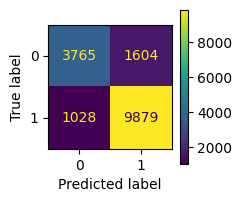

In [35]:
cm=confusion_matrix(y_val,y_pred_lsvc)
matrix=ConfusionMatrixDisplay(confusion_matrix=cm)
matrix.plot()
plt.gcf().set_size_inches(2, 2)
plt.show()

In [36]:
print(classification_report(y_val,y_pred_lsvc))  

              precision    recall  f1-score   support

           0       0.79      0.70      0.74      5369
           1       0.86      0.91      0.88     10907

    accuracy                           0.84     16276
   macro avg       0.82      0.80      0.81     16276
weighted avg       0.84      0.84      0.84     16276



<font size='3'>
Considering the confusion matrices and classification reports, it can be concluded that all three models perform very similarly. Since Logistic Regression is more interpretable compared to the other models, it will be considered for the final model.
</font>